In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import sys
sys.path.insert(0, "../src/")
from glob import glob
import yaml

In [8]:
import numpy as np
import pandas as pd
import xarray as xr

In [9]:
from niwtools.tools import *
from niwtools.analysis import *
from niwtools.plotting import *

In [10]:
pwd

'/Users/sebastianessink/Dropbox (MIT)/niw/notebooks'

In [53]:
data_path = '/Users/sebastianessink/Dropbox (MIT)/epsilon/data/niw2016/vel/'
magvar = [] 
time = []

for file in glob(data_path+'*7787a*-vel*'):
    magvar.append( load_matfile(file)['magvar'] )
    time.append( pd.to_datetime(load_matfile(file)['uxt'][0], unit='s'))

In [54]:
ds = xr.Dataset(coords = {'time':time})
ds['magvar'] = ('time', magvar)

Text(0, 0.5, 'Magvar')

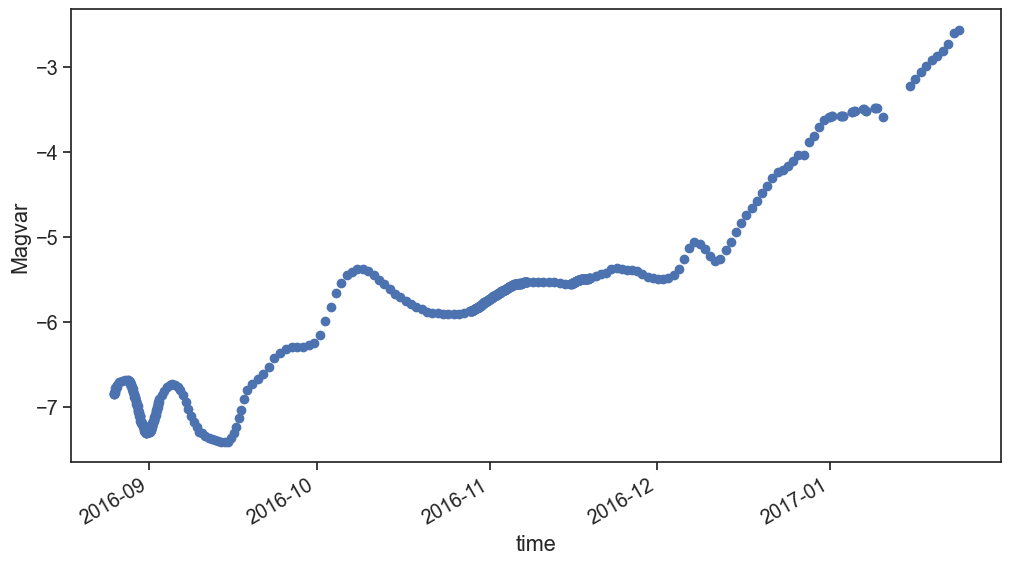

In [55]:
ds.magvar.plot(marker='o', lw=0)
plt.ylabel('Magvar')

In [56]:
ds.to_netcdf('magvar_7787a.nc')